In [185]:
#cell1

import pandas as pd
#load Pandas for data structures and operations for manipulating numerical tables and time series.
import numpy as np
#Load NumPy for linear algebra/ Numerical Python
data = pd.read_csv('data_csv/policey_zuerich.csv')

data.head()
data.columns

# for row in data['Matters']:
#     print( '------\n', row )


#loading the data from the .csv-file
# having an overview of the columns (and number of rows)

# Important: in Policey_bern are the UNIQUE laws per date available. These are 4932 laws. 
# However, these laws have a lot of 'matters' within one cel. 

Index(['LawID', 'URI', 'LegislatorID', 'LegislatorName', 'LegislatorTitle',
       'LegislatorReligion', 'LegislatorRuleBegin', 'LegislatorRuleEnd',
       'TerID', 'TerShortLabel', 'TerSeq', 'TerLabel', 'TerOrg', 'TerOrgID',
       'TerType1', 'TerType2', 'TerReligion', 'TerDistrict', 'TerPublished',
       'TerEditor', 'TerLitList', 'TerAbbrevList', 'TerPreface', 'Datum',
       'Date1', 'Date', 'Year', 'Month', 'Day', 'Form', 'Scope', 'RelatesTo',
       'Publication', 'Archive', 'Title', 'Facs', 'URL', 'Matters', 'Dirty',
       'Controlled', 'Links'],
      dtype='object')

In [186]:
from random import randrange

zuerich = pd.read_csv( 'data_csv/policey_zuerich.csv' ).rename( str.lower, axis='columns' )

# This is a check to see what the matters column data looks like, *and* to see if we can get
# rid effectively of the opening and closing parantheses (that'll mess up our split and explode routine).
for i in np.random.randint( 1, len( zuerich.index )+1, 5):
    print( i, ':\n', zuerich.iloc[i]['matters'], '\n' )

zuerich = zuerich.assign( matters=zuerich[ 'matters' ].str[1:-1] )

for i in np.random.randint( 1, len( zuerich.index )-1, 5):
    print( i, ':\n', zuerich.iloc[i]['matters'], '\n' )
                         


884 :
 (ZUR.01.001.0090.00379.0,,4.7,Geld- und Kreditwesen,,Münzwesen,,,,,Münzfuß; Suspendierung; Verruf; Valvation; Zulässige Sorten; Eidgenossenschaft; Münzordnung,,,,,,) 

243 :
 (ZUR.01.001.1780.04530.0,,1.4,Aufwand und Luxus,,Aufwand,,,,,Hochzeit,,,,,,) 

1335 :
 (ZUR.01.001.1257.03560.0,,4.7,Geld- und Kreditwesen,,Münzwesen,,,,,Suspendierung; Verruf,,,,,,) 

1195 :
 (ZUR.01.001.1912.04919.0,,1.4,Aufwand und Luxus,,Aufwand,,,,,Tabak; Tabakrauchen,,,,,,) 

1178 :
 (ZUR.01.001.0206.00644.0,,1.1,Religionsangelegenheiten,,Feiertage/Religiöse Feste,,,,,Gottesdienstgang; Alkoholkonsum; Verbot; Sonntagsarbeit; Buß- & Bettag,,,,,,) 

273 :
 ZUR.01.001.1812.04594.1,,4.6,Handel und Dienstleistungen,,Fürkauf,,,,,Termingeschäft; Verbot,,,,,,),(ZUR.01.001.1812.04594.0,,4.6,Handel und Dienstleistungen,,Handelsbedingungen,,,,,Termingeschäft; Verbot,,,,,,),(ZUR.01.001.1812.04592.0,,4.7,Geld- und Kreditwesen,,Kreditwesen,,,,,Bedingungen,,,,,,),(ZUR.01.001.1812.04593.0,,5.3,Grundstücks- und Bodenor

In [187]:
zuerich = pd.read_csv( 'data_csv/policey_zuerich.csv' ).rename( str.lower, axis='columns' )

# Met de volgende regel maken we van de waarde in het veld subcategories een array (list)
# door te splitsen op de '; ' die tussen elke subcategorie staat.
zuerich = zuerich.assign( matters=zuerich[ 'matters' ].str[1:-1] )
zuerich = zuerich.assign( matters=zuerich[ 'matters' ].str.split( '\),\(' ) )

# Met de functie 'explode' kunnen we nu voor elke subcategorie in die array
# een duplicaat-regel aanmaken.
zuerich = zuerich.explode( 'matters' )

# Bestudeer het effect in deze eerste 100 regels
zuerich.head( n=100 )

,lawid,uri,legislatorid,legislatorname,legislatortitle,legislatorreligion,legislatorrulebegin,legislatorruleend,terid,tershortlabel,...,relatesto,publication,archive,title,facs,url,matters,dirty,controlled,links
0,ZUR.01.001.1685,NaN,ZUR.01.001,Bürgermeister und Kleiner und Großer Rat der S...,NaN,EV,1336,1798,ZUR,ZUR,...,NaN,NaN,"StAZ, A 42,2",NaN,NaN,NaN,"ZUR.01.001.1685.04379.0,,5.1,Wasser,,Gräben,,,...",NaN,NaN,NaN
1,ZUR.01.001.0806,NaN,ZUR.01.001,Bürgermeister und Kleiner und Großer Rat der S...,NaN,EV,1336,1798,ZUR,ZUR,...,NaN,NaN,"StAZ, A 42.2",NaN,NaN,NaN,"ZUR.01.001.0806.05102.0,,3.2,Sozialwesen,,Wais...",NaN,NaN,NaN
1,ZUR.01.001.0806,NaN,ZUR.01.001,Bürgermeister und Kleiner und Großer Rat der S...,NaN,EV,1336,1798,ZUR,ZUR,...,NaN,NaN,"StAZ, A 42.2",NaN,NaN,NaN,"ZUR.01.001.0806.05103.0,,4.6,Handel und Dienst...",NaN,NaN,NaN
1,ZUR.01.001.0806,NaN,ZUR.01.001,Bürgermeister und Kleiner und Großer Rat der S...,NaN,EV,1336,1798,ZUR,ZUR,...,NaN,NaN,"StAZ, A 42.2",NaN,NaN,NaN,"ZUR.01.001.0806.02893.0,,4.7,Geld- und Kreditw...",NaN,NaN,NaN
2,ZUR.01.001.1986,NaN,ZUR.01.001,Bürgermeister und Kleiner und Großer Rat der S...,NaN,EV,1336,1798,ZUR,ZUR,...,NaN,NaN,"StAZ, A 42.1",NaN,NaN,NaN,"ZUR.01.001.1986.05088.0,,4.1,Landwirtschaft,,W...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48,ZUR.01.001.1954,NaN,ZUR.01.001,Bürgermeister und Kleiner und Großer Rat der S...,NaN,EV,1336,1798,ZUR,ZUR,...,NaN,NaN,"StAZ, A 42.3 (Verbotbuch)",Das jederman sin Tuben innbheige.,NaN,NaN,"ZUR.01.001.1954.05036.0,,1.3,Randgruppen,,Zige...",NaN,NaN,NaN
48,ZUR.01.001.1954,NaN,ZUR.01.001,Bürgermeister und Kleiner und Großer Rat der S...,NaN,EV,1336,1798,ZUR,ZUR,...,NaN,NaN,"StAZ, A 42.3 (Verbotbuch)",Das jederman sin Tuben innbheige.,NaN,NaN,"ZUR.01.001.1954.05035.0,,4.1,Landwirtschaft,,T...",NaN,NaN,NaN
49,ZUR.01.001.1953,NaN,ZUR.01.001,Bürgermeister und Kleiner und Großer Rat der S...,NaN,EV,1336,1798,ZUR,ZUR,...,NaN,NaN,"StAZ, A 42.3 (Verbotbuch)",NaN,NaN,NaN,"ZUR.01.001.1953.05033.0,,4.1,Landwirtschaft,,T...",NaN,NaN,NaN
49,ZUR.01.001.1953,NaN,ZUR.01.001,Bürgermeister und Kleiner und Großer Rat der S...,NaN,EV,1336,1798,ZUR,ZUR,...,NaN,NaN,"StAZ, A 42.3 (Verbotbuch)",NaN,NaN,NaN,"ZUR.01.001.1953.05034.0,,4.2,Forst- und Bodenn...",NaN,NaN,NaN


(array([   0.,    0.,    0.,    0.,    0., 5608.,    0.,    0.,    0.,
           0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <BarContainer object of 10 artists>)

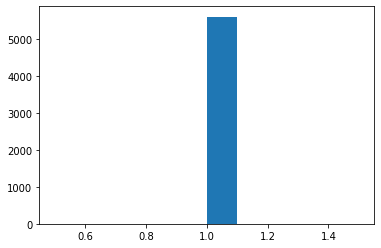

In [188]:
# Okay, we can split the ZUR-thingies per row easily enough, but then we need to figure out what is
# actually *inside* of those thingies and that turns out to be not easy and at the very least
# quite confusing. So let's use Python to explore our data, what it looks like.

import matplotlib.pyplot as plt

# First I think we want to know how many rows have multiple ZUR-thingies and
# how many ZUR-thingies we expect to find per row. That's what a histogram is for.
rows = zuerich['matters']
lens = []
for row in rows:
    leng = len( row.split( '),(' ) )
    lens.append( leng )
        
plt.hist( lens )


In [189]:
# So, there are 1747 rows that have just one ZUR-thingy. And then there are far and far less
# that have multiple. Just for introspection let's see what's in the ones that actually have 20
# ZUR-thingies.

rows = zuerich['matters']
lens = []
for row in rows:
    leng = len( row.split( '),(' ) )
    if leng == 20:
        print( row, '\n----\n' )



In [190]:
# That didn't tell us a whole awful lot, but at least we now know that the 
# bigger majority of rows has only one ZUR-thingy.
#
# We also see that there are an awful lot of commas in each ZUR-thingy
# these commas define spaces between the commas to hold information.
# Let's call these spaces 'bins'. 
#
# In essence now we know that each ZUR-thingy has bins, but how many?
# Do they all have the same amount of bins?
# To know this we need to count the commas in all ZUR-thingies and see if that number varies.

rows = zuerich['matters']
for row in rows:
    items = row.split( '),(' )
    for item in items:
        comma_counts.append( len( item.split(',') ) )

print( set( comma_counts ) )

{35, 42, 17, 18, 19, 20, 21, 22, 23}


In [191]:
# Okay, the number of commas (and thus bins) varies. That sucks a bit because
# it means each ZUR-thing does not have the same exact make up and we need
# complicated heuristics to curate and analyze them in a spreadsheet or Pandas 
# or what have you.
#
# At least we have determined that at max there are 42 atoms in one single ZUR-thingy
# Now we want to know if the places between commas ('bins') are consistently 
# filled, or if we have large variation.
#
# So here for each ZUR-thingy we count what bin number has some information and
# which bin numbers are just empty. This should give us an idea bout how bins are
# used across ZUR-thingies.

example_idxs = (0,0)
bins = [0]*42
rows = zuerich['matters']
for row_idx, row in enumerate( rows ):
    zurthingies = row.split( '),(' )
    for zur_idx, zur in enumerate( zurthingies ):
        for idx, atom in enumerate( zur.split(',') ):
            if( atom != '' ):
                bins[idx] += 1
                if( idx==38 ):
                    example_idxs = ( row_idx, zur_idx )
print( example_idxs )
example_binfills = zuerich.iloc[example_idxs[0]]['matters'].split( '),(' )[example_idxs[1]].split( ',' )
for idx, bin in enumerate( bins ):
    print( '{:3d}'.format( idx ), '{:5d}'.format( bin ), example_binfills[idx]  )

(4921, 0)
  0  5608 ZUR.01.001.0699.02604.0
  1     0 
  2  5608 4.6
  3  5608 Handel und Dienstleistungen
  4     0 
  5  5608 Maße & Gewichte
  6     0 
  7     0 
  8     0 
  9     0 
 10  5530 Getreide
 11   339 
 12   142 
 13   146 StAZ III AAb 1.12: Verordnungen 11.11.1762
 14    86  Mai 1763
 15    40  11.11.1763
 16    18  Mai 1764
 17     8  Mai 1765
 18     5  11.11.1765 & Mai 1766 StAZ III AAb 1.13: Verordnungen 11.11.1766
 19     3  11.11.1767; 11.11.1768
 20     3 11.11.1769 & 11.11.1770 StAZ III AAb 1.14: Verordnungen 11.11.1771
 21     2  11.11.1772
 22     2  11.11.1773
 23     2  11.11.1774
 24     2  11.11.1755
 25     2  11.11.1776
 26     2  11.11.1778
 27     2  11.11.1779 & 11.11.1780 StAZ III AAb 1.15: Verordnungen 11.11.1781
 28     2  11.11.1782
 29     2  11.11.1783
 30     2  11.11.1784
 31     2  März 1787
 32     1  März 1788 & April 1789 StAZ III AAb 1.16: Verordnungen 23.03.1790
 33     1  16.04.1791
 34     1  31.03.1792
 35     1  23.03.1793
 36     1

In [192]:
# So, in the above the first column gives the bin number.
# The second column tells us how often that bin is filled.
# 
# Ah! Here we learn a plenty lot!
# bins 1,4, and 6, 7, 8, 9 are never used. Apparently they divide ZUR thingy number,
# main and secondary categories or some such
#
# We have also determined that at no single ZUR-thingy has any filling for the 
# 'comma-place' 39 or beyond.
#
# Also we note that basically anything that is in bin 11 and beyond is
# noise, none of the comma-places beyond place #10 seem to matter. 
#
# But we want to check this, so let's study what's in those places.

rows = zuerich['matters']
for row_idx, row in enumerate( rows ):
    zurthingies = row.split( '),(' )
    for zur_idx, zur in enumerate( zurthingies ):
        zur_id = ''
        exceptions = ''
        for idx, atom in enumerate( zur.split(',') ):
            if( idx==0 ):
                zur_id = atom 
            if( atom != '' ) and idx > 10:
                exceptions += '    {} --> {}\n'.format( idx, atom )
        if( exceptions != '' ):
            print( zur_id )
            print( exceptions )

ZUR.01.001.1880.04436.0
    13 --> Geschätztes Datum: 00.00.1488.

ZUR.01.001.1946.05016.0
    11 -->  öffentliches

ZUR.01.001.1946.05014.0
    13 --> Geschätztes Datum: 00.00.1500.

ZUR.01.001.1946.05014.1
    13 --> Geschätztes Datum: 00.00.1500.

ZUR.01.001.1870.05098.0
    13 --> Geschätztes Datum: 00.00.1500.

ZUR.01.001.1947.05024.0
    13 --> Geschätztes Datum: 00.00.1500.

ZUR.01.001.1708.05099.0
    13 --> Geschätztes Datum: 00.00.1500. Egli Nr. 52: Verordnung 25.05.1519.

ZUR.01.001.1751.04486.0
    13 --> Geschätztes Datum: 00.00.1501.

ZUR.01.001.1948.05025.0
    11 --> Es wird Bezug genommen auf das Haus von Bürgermeister Wyss (1502-1510)

ZUR.01.001.1948.05023.0
    13 --> Geschätztes Datum: 00.00.1502
    14 -->  es wird Bezug genommen auf das Haus von Bürgermeister Wyss (1502-1510).

ZUR.01.001.1752.05003.0
    13 --> Geschätztes Datum: 00.00.1503.

ZUR.01.001.1955.05039.0
    13 --> Geschätztes Datum: 00.00.1503.

ZUR.01.001.1956.05040.0
    13 --> Geschätztes Datum: 

    11 --> Ausnahme Brettspiel bescheiden

ZUR.01.001.0558.02101.0
    11 --> Bisher war nur erwähnt
    12 -->  dass die Torwachen niemanden hinauslassen sollten
    13 -->  nun erstmals im Rahmen eines umfassenden Sittenmandats auch der Eingang verweigert durch Torwachen.

ZUR.01.001.0559.02123.0
    11 --> Es wird den Rhein- und Limmatschiffsleuten verboten
    12 -->  Personen zu transportieren
    13 -->  die auswandern möchten
    14 -->  auch deren Güter.

ZUR.01.001.0559.02125.0
    11 --> Wiederum für Ausreisewillige (Carolina).

ZUR.01.001.0560.02126.0
    11 --> Buchenholz; Besseres Laubholz; Schlechteres Laubholz; Tannenholz bilden je eine Preiskategorie

ZUR.01.001.0561.02127.0
    11 --> Die betreffenden Geldsorten sollen insbesondere nicht als `Arbeits- oder Lidlohn` ausgegeben werden.

ZUR.01.001.0564.02131.0
    11 --> Gewöhnlicher Degen; Hirschfänger; Stilet

ZUR.01.001.0565.02132.0
    11 --> Ausnahme Jahrmärkte zu Stadt und Land
    12 -->  an denen auch von fremden

In [193]:
# So indeed it would seem we really only need to care about bins 1 to 10.
# The other bins are estimated dates and comments.
# The comments are fun and informative to read though:
#
#  ZUR.01.001.0028.00080.0
#     11 --> `... keinen dolchen oder kurtz gwer und darzu ein lang gwer oder waaffen miteinanderen
#     12 -->  weder heimlich noch offentlich
#     13 -->  in keinen wäg
#     14 -->  an jm tragen noch haben.
#     15 --> Von Waaffen zetragen.